In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import blur_detector


[|                  ] 10%
[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%
[| | | | | | |      ] 70%
[| | | | | | | |    ] 80%
[| | | | | | | | |  ] 90%
[| | | | | | | | | |] 100%
0.04475175140734004


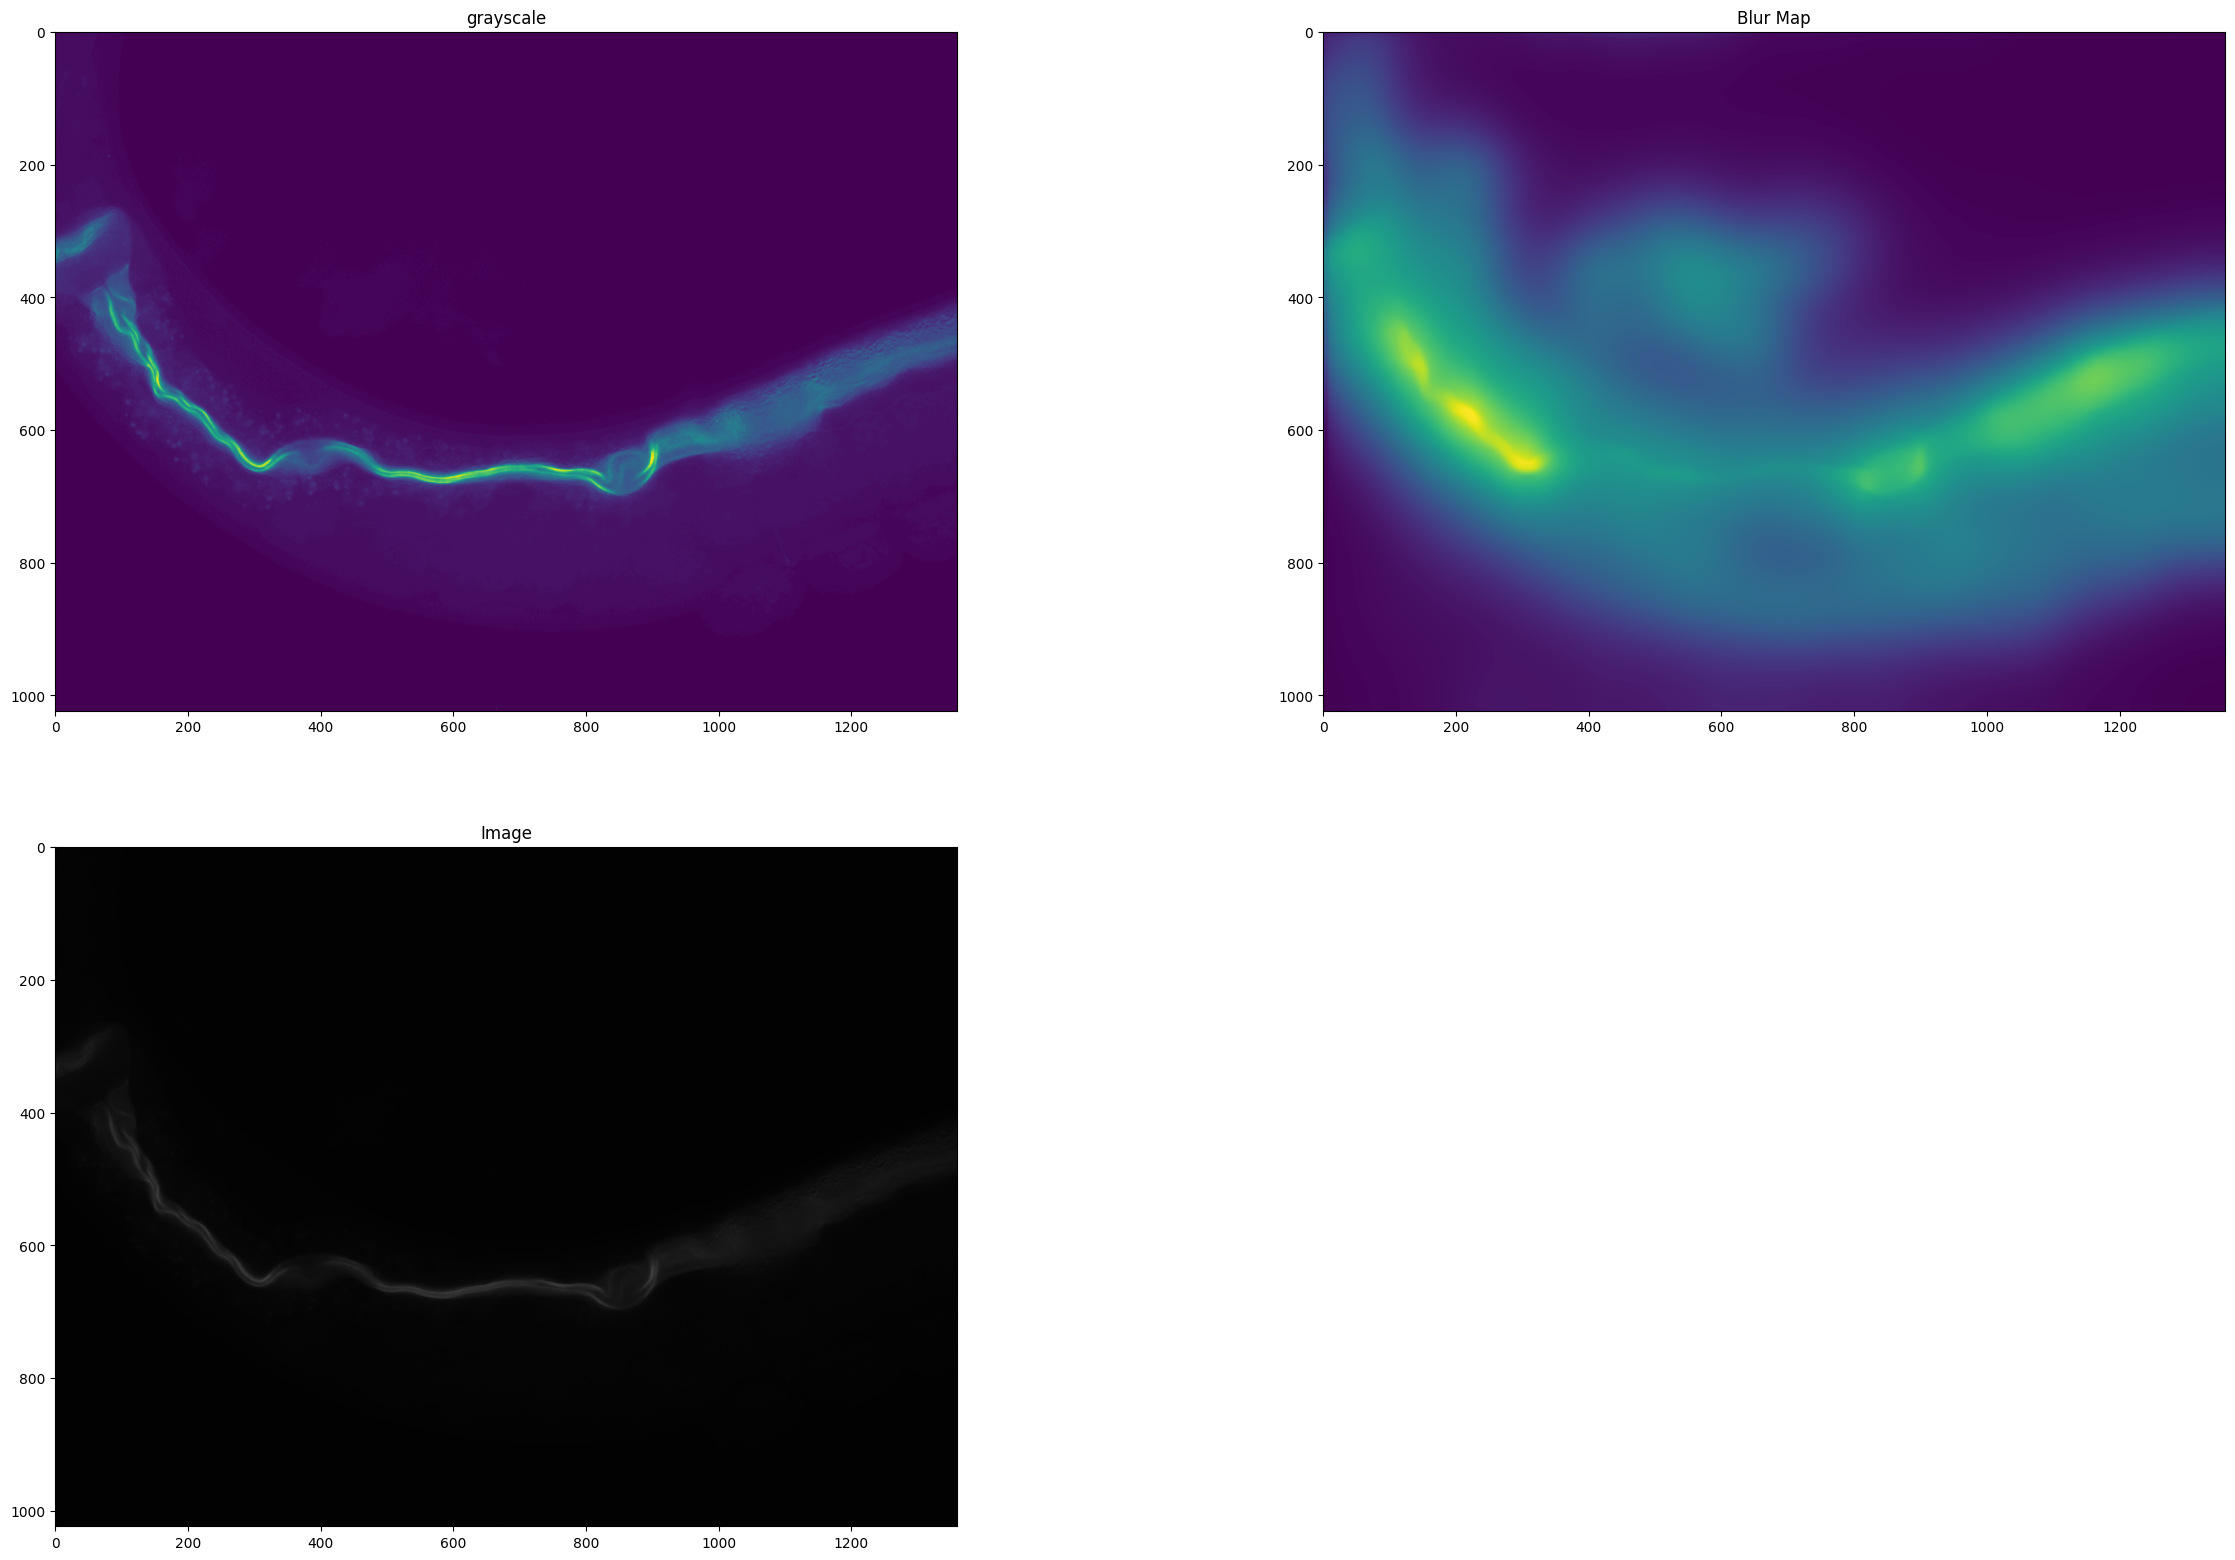

In [12]:
image = cv2.imread('testimages/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b(1).tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if __name__ == '__main__':
    # img = cv2.imread('image_name', 0)
    blur_map = blur_detector.detectBlur(gray, downsampling_factor=4, num_scales=4, scale_start=2, num_iterations_RF_filter=3)
    # cv2.imshow('ori_img', image)

plt.figure(figsize=(30, 30))

plt.subplot(3, 2, 1)
plt.title("grayscale")
plt.imshow(gray)

plt.subplot(3, 2, 2)
plt.title("Blur Map")
plt.imshow(blur_map)

plt.subplot(3, 2, 3)
plt.title("Image")
plt.imshow(image)

print(blur_map.var())
plt.show()

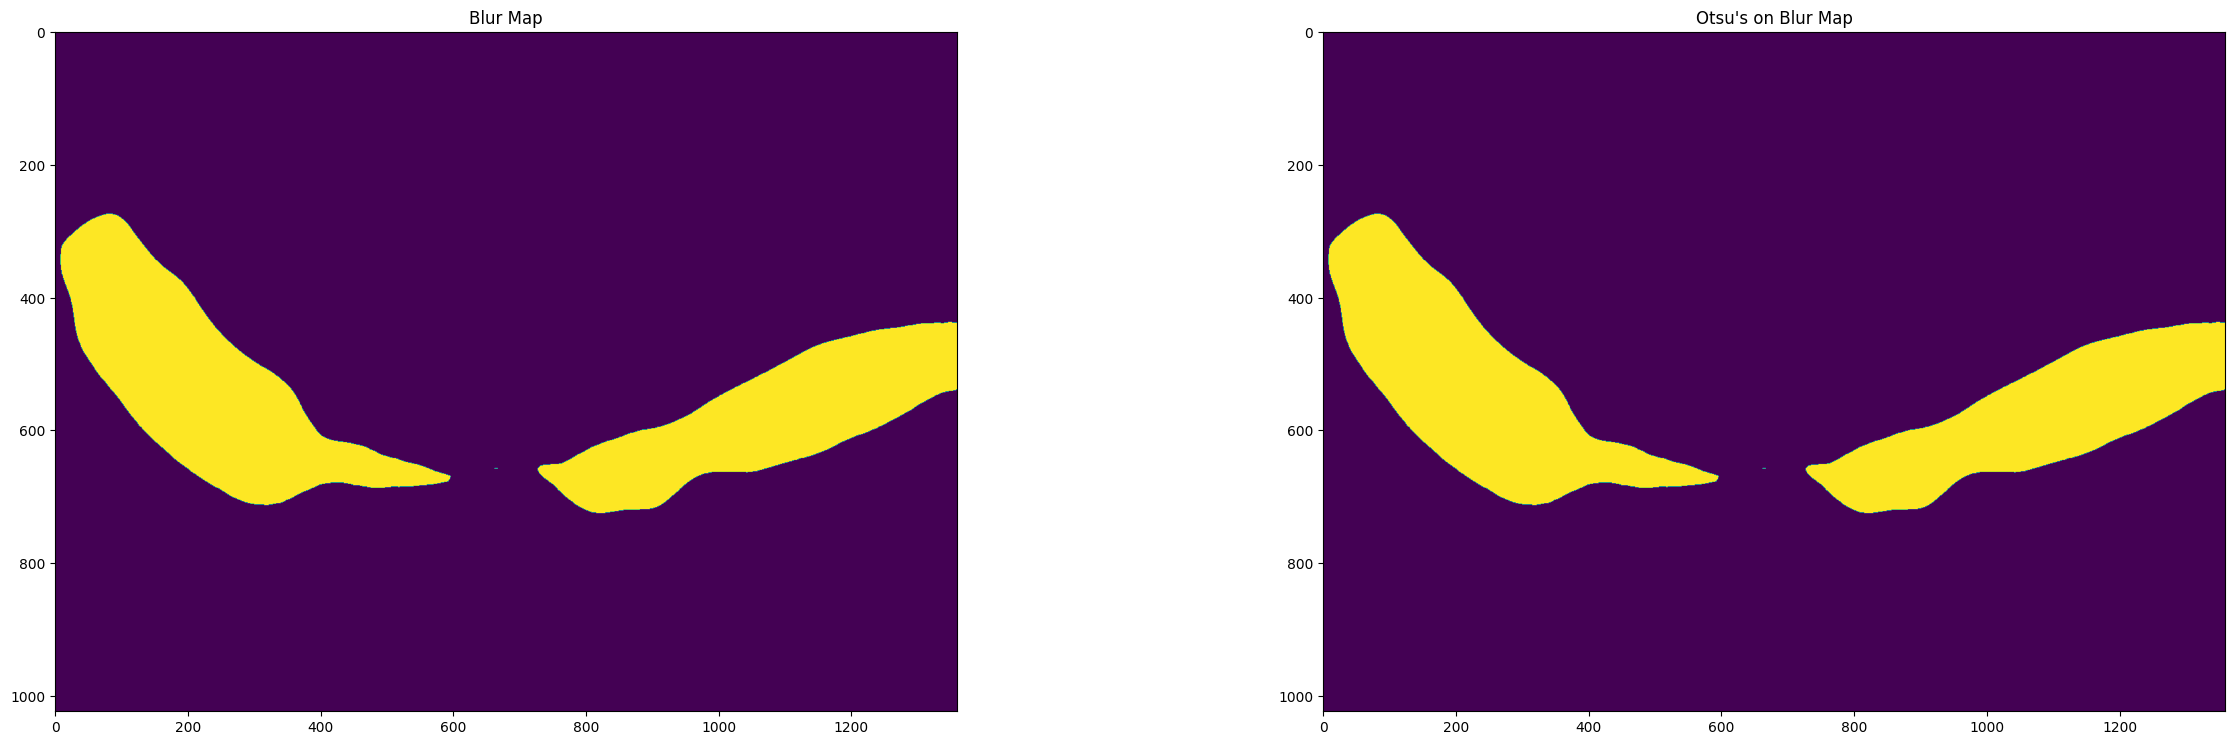

In [17]:
# # Values below 127 goes to 0 (black, everything above goes to 255 (white)
# ret,thresh1 = cv2.threshold(blur_map,  127, 255, cv2.THRESH_BINARY)

# # It's good practice to blur images as it removes noise
# blur_map = cv2.GaussianBlur(blur_map, (7, 7), sigmaX=0, sigmaY=0)
blur_map = cv2.convertScaleAbs(blur_map)
blur_map_thres = cv2.threshold(blur_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Blur Map")
plt.imshow(blur_map)


plt.subplot(3, 2, 2)
plt.title("Otsu's on Blur Map")
plt.imshow(blur_map_thres)
plt.show()


23.576127884152346
3035.3510730130824


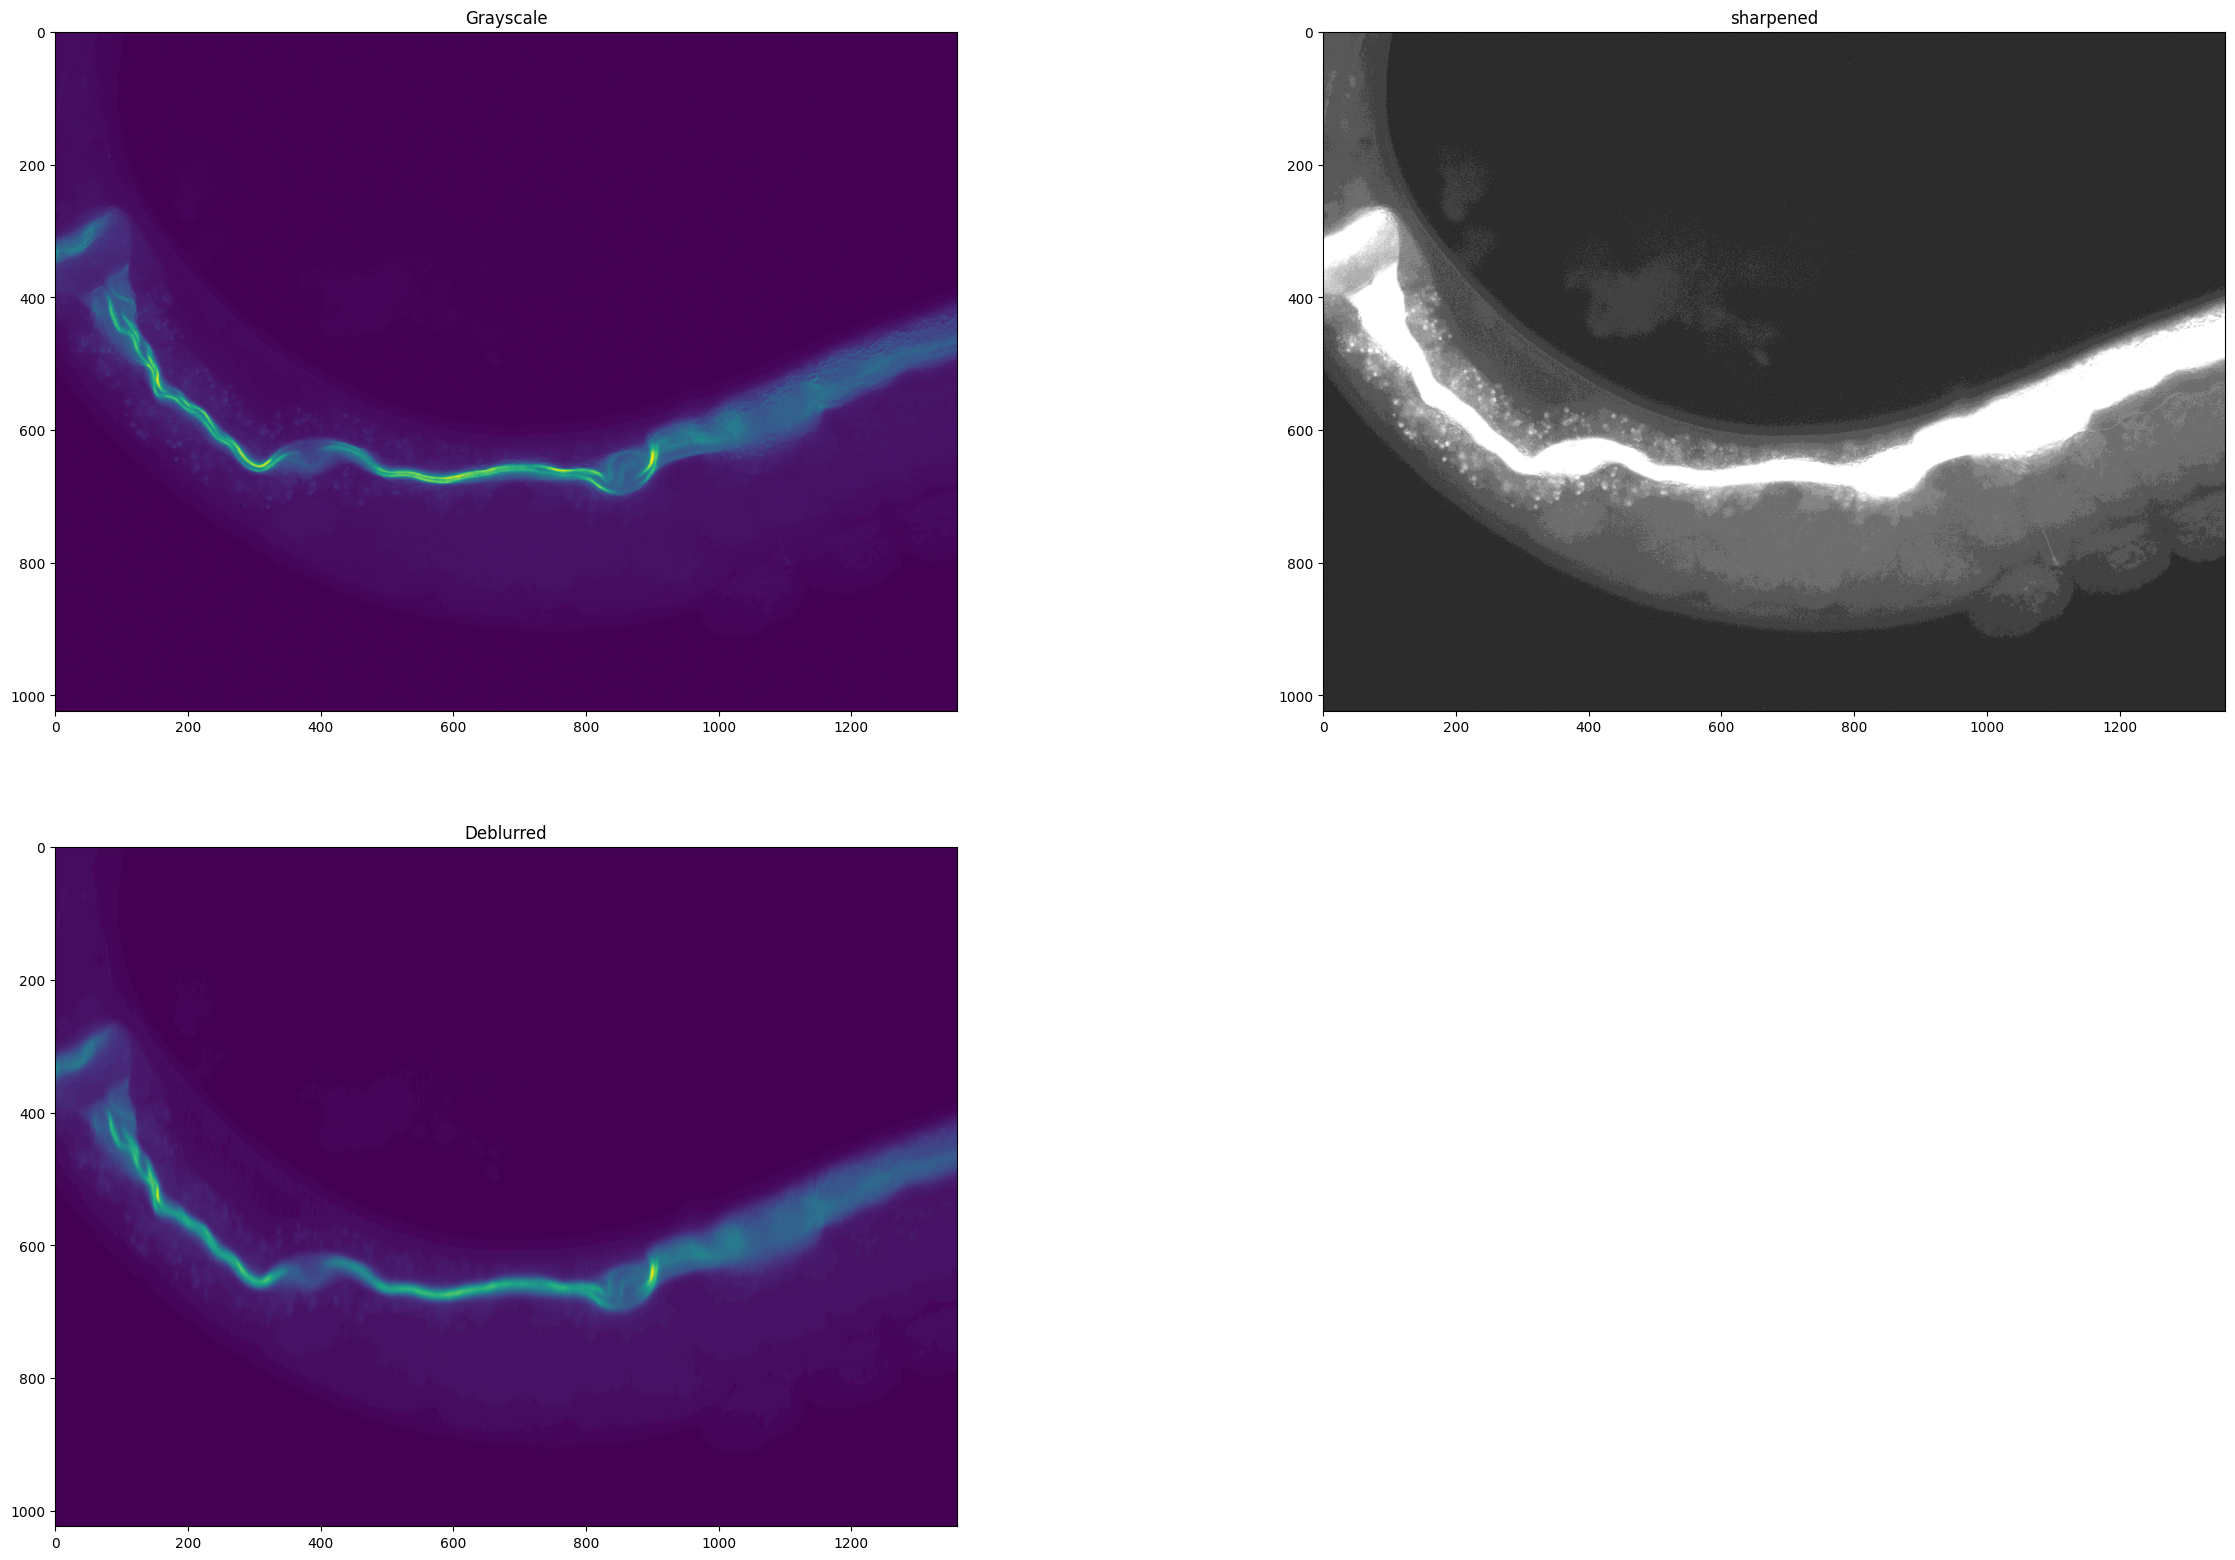

In [14]:
kernel = cv2.getGaussianKernel(1000, 4)


sharpen_kernel = np.array([[-1,-1,-1], 
                           [-1,30,-1], 
                           [-1,-1,-1]])
sharpen = cv2.filter2D(image, -1, sharpen_kernel)

deblurred = cv2.filter2D(gray, -1, kernel)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()

print(gray.var())
print(sharpen.var())

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Grayscale")
plt.imshow(gray)

plt.subplot(3, 2, 2)
plt.title("sharpened")
plt.imshow(sharpen)

plt.subplot(3, 2, 3)
plt.title("Deblurred")
plt.imshow(deblurred)

plt.show()



Contours and approximating contours

Number of Contours found = 0


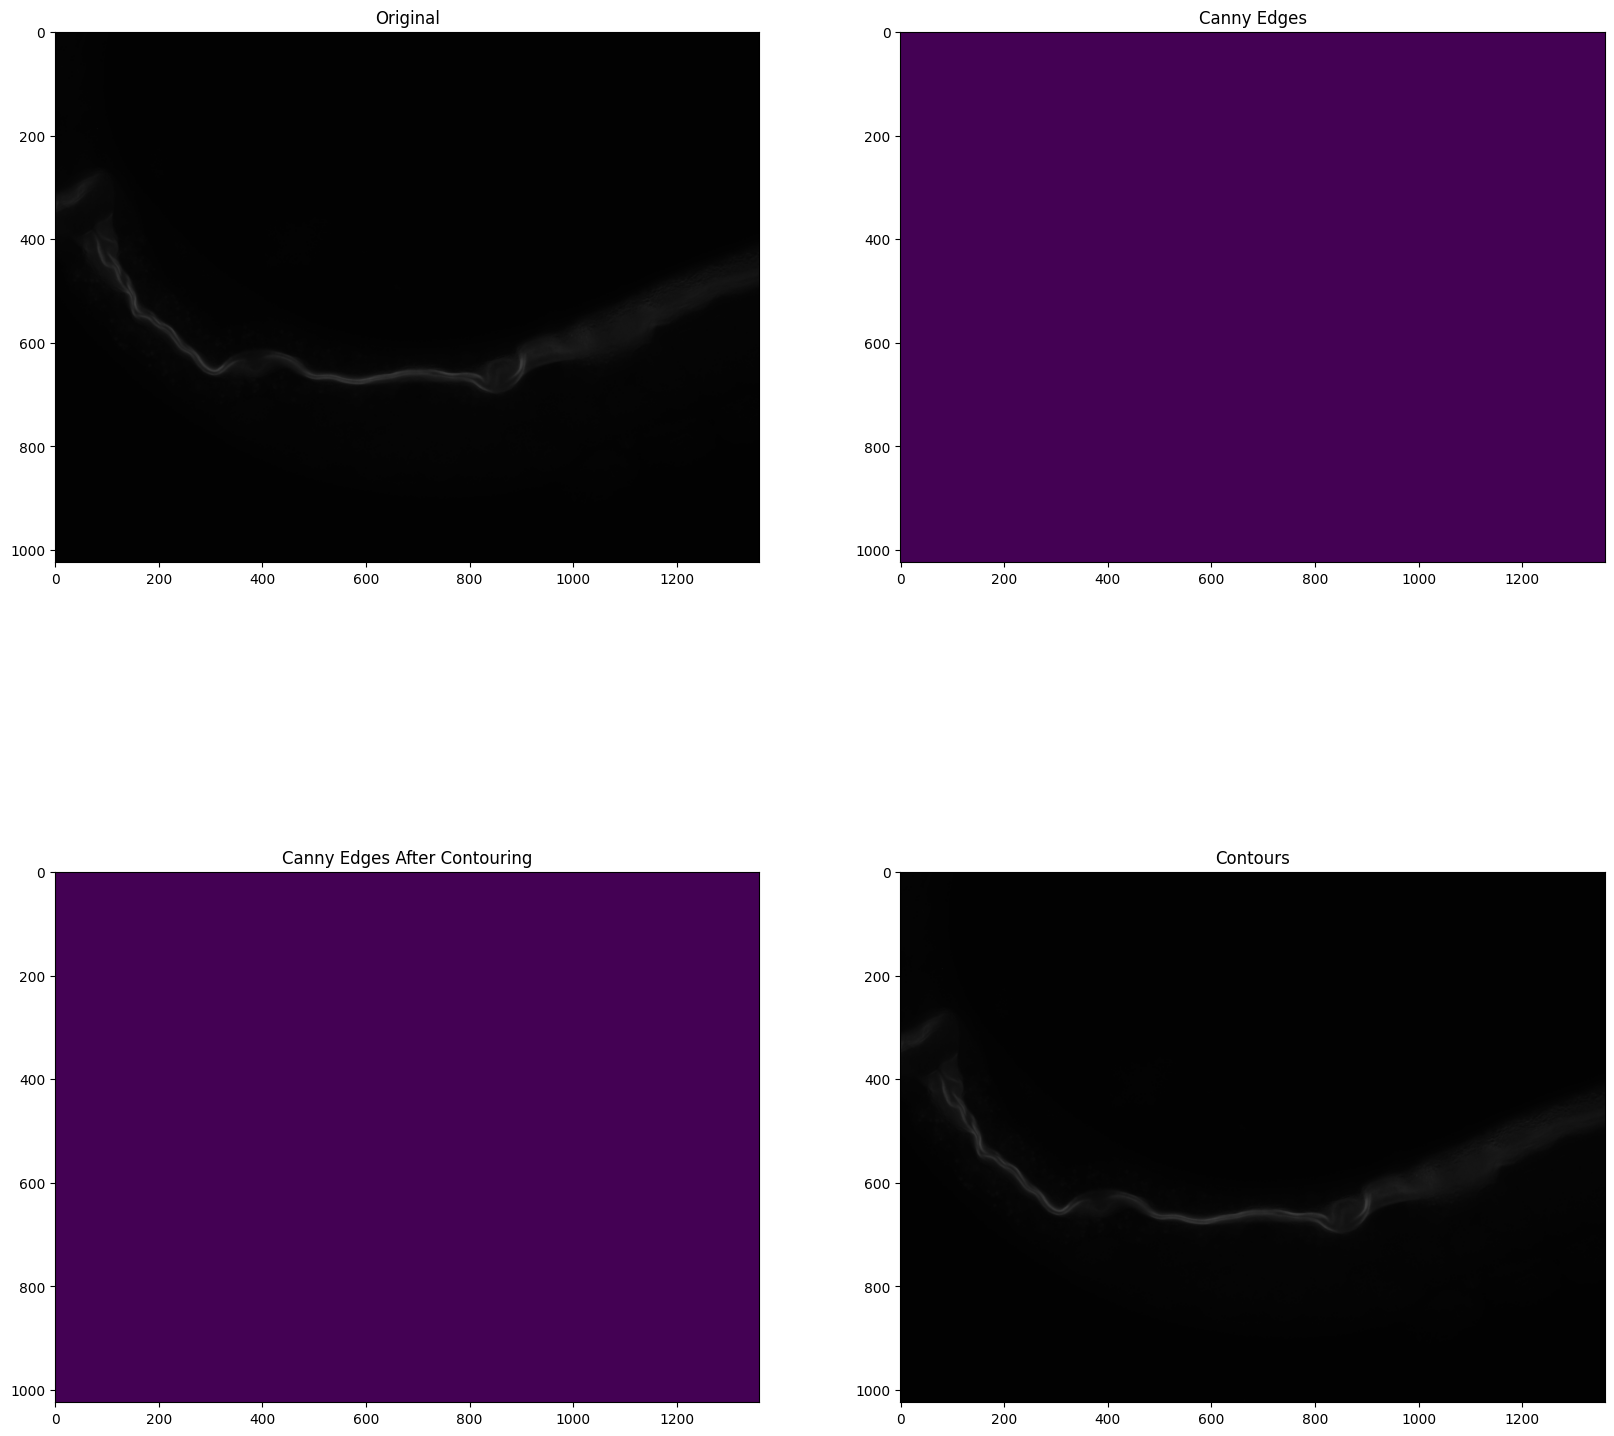

In [15]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)


# Grayscale
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(image, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)


# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

approximating contours

measuring based on conditions